<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

---

# Clustering

## 🏆 학습 목표 

- Scree plot의 의미를 이해 할 수 있다.
- Supervised / Unsupervised learning의 차이를 설명 할 수 있다.
- K-means clustering을 설명 할 수 있다.

---

## ❓ 시작하기전에

- 심리검사 결과를 (예를 들면 MBTI) 바탕으로 사람들을 그룹 지으려면 어떻게 해야 할까요?
- 지역별 개인 소득 수준 데이터가 있다고 할때, 이를 가지고 어떤 분석을 할 수 있을까요?

- [부산시 개인별 소득수준 데이터](
https://bigdata.busan.go.kr/board/view.busan?boardId=BIGDATA&menuCd=DOM_000000101001000000&paging=ok&startPage=3&categoryCode1=A01&-dataSid=119)

## Scree Plots

<https://m.blog.naver.com/PostView.nhn?blogId=hsj2864&logNo=220613527515>

<https://en.wikipedia.org/wiki/Scree_plot>

<https://ro-che.info/articles/2017-12-11-pca-explained-variance>

PCA 에서 사용된 PC의 개수와 설명가능한 Variance를 그린 것.

관례적으로 80% 이상 을 설명하는 만큼의 PC를 선택함.


<img src='https://user-images.githubusercontent.com/6457691/90082093-e6a2c700-dd49-11ea-9ae6-0ff69ad89edb.png' width = 400>

<img src='https://user-images.githubusercontent.com/6457691/90082429-b9a2e400-dd4a-11ea-8c04-d8121d7da279.png' width = 400>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import decomposition

X1, Y1 = make_blobs(n_features = 10, n_samples = 50, centers = 4, random_state = 4, cluster_std = 2)

# generate random "cluster" value to X1, label to Y1

pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)

pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-1.693533,16.790501,-4.092064,0.434973,3
1,18.370598,-2.760074,-0.991275,-0.075295,1
2,19.004565,-3.839676,2.203772,5.791966,1
3,-10.452993,-12.551490,-6.931626,1.818382,0
4,-2.845042,16.002681,-5.310753,0.609581,3


---
[0.42388369 0.33544098 0.16252554 0.02350764]
---
[1 2 3 4]
---
[0.42388369 0.75932467 0.92185022 0.94535786]


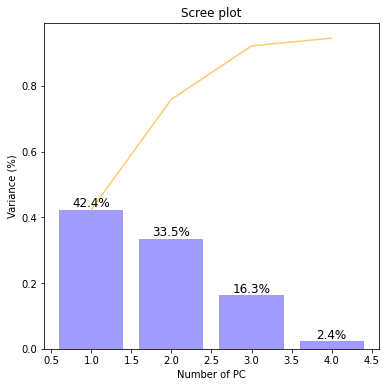

In [21]:
num_components = len(pca.explained_variance_ratio_) # PC 개수

print('---')
print(pca.explained_variance_ratio_) 

ind = np.arange( num_components ) + 1 # 
print('---')
print(ind) 

vals = pca.explained_variance_ratio_

plt.figure(figsize = (6, 6))

ax = plt.subplot()
cumvals = np.cumsum(vals) # 누적 var 
print('---')
print(cumvals)

plt.bar(ind, vals, color = '#a29bfe') # bar plot
plt.plot(ind, cumvals, color = '#fdcb6e') # line plot

for i in range(num_components):
    ax.annotate( str(np.round(vals[i]*100, 1)) + '%', 
                (ind[i], vals[i]), 
                va = "bottom",
                ha = "center",
                fontsize = 12)
  
ax.set_xlabel("Number of PC")
ax.set_ylabel("Variance (%)")
plt.title('Scree plot');

---


# Machine Learning (개요)

<img src='https://user-images.githubusercontent.com/6457691/90085090-148c0980-dd52-11ea-9a1b-a7f4e52b9319.png' width = 600>


- ## 지도 학습 (Supervised Learning): 
Supervised Learning은 트레이닝 데이터에 라벨(답)이 있을때 사용 할 수 있습니다. 그 결과물은 원하는 것에 대한 예측입니다.

  - ### 분류 (Classification)
  분류 알고리즘은 주어진 데이터의 카테고리 혹은 클래스 예측을 위해 사용 됩니다.
  - ### 회귀 (Regression)
  회귀 알고리즘은 continuous 한 데이터 (숫자형태)를 바탕으로 결과를 예측 하기 위해 사용 됩니다 (선형 회귀와는 조금 다릅니다)

- ## 비지도 학습 (Unsupervised Learning):
  - ### 클러스터링 (Clustering)
  데이터의 연관된 feature를 바탕으로 유사한 그룹을 생성합니다.
  - ### 차원 축소 (Dimensionality Reduction
  높은 차원을 갖는 데이터셋을 사용하여 feature selection / extraction 등을 통해 차원을 줄이는 방법입니다.
  - ### 연관 규칙 학습 (Association Rule Learning)
  데이터셋의 feature들의 관계를 발견하는 방법입니다 (feature-output 이 아닌 feature-feature)

<img src='https://user-images.githubusercontent.com/6457691/90086271-0a1f3f00-dd55-11ea-9aeb-b3a794fbb3fb.png' width = 500>



- ## 강화 학습 (Reinforcement Learning)
  머신러닝의 한 형태로, 기계가 좋은 행동에 대해서는 **보상**, 그렇지 않은 행동에는 **처벌**이라는 피드백을 통해서 *행동*에 대해 학습해 나가는 형태입니다. 

  <img src='https://user-images.githubusercontent.com/6457691/90086283-0e4b5c80-dd55-11ea-9331-c6e9bc63775d.png' width=500>

# ML Cheat Sheets (참고용)

<img src='https://jixta.files.wordpress.com/2015/11/machinelearningalgorithms.png?w=816&h=521&zoom=2'>


# Clustering 

Clustering은 Unsupervised Learning Algorithm의 한 종류입니다. 
(Train Data에 대해서 label도 없고, 몇 개의 클러스터가 정확한지조차도 없는 경우가 있습니다.)

## Clustering의 목적

Clustering이 대답할수 있는 질문은 주어진 데이터들이 **얼마나, 어떻게 유사한지** 입니다. 그렇기 때문에 주어진 데이터셋을 요약/정리 하는데 있어서 매우 효율적인 방법들중 하나로 사용 되고 있습니다. 

그러나 동시에 정답을 보장하지 않는다는 이슈가 있어서 production의 수준에서 예측을 위한 모델링에 쓰이기 보다는 데이터 탐색을 위한 방법으로써 많이 쓰입니다.

# Clustering의 종류:

## Hierarchical:

  - Agglomerative: 개별 포인트에서 시작후 점점 크게 합쳐감
  
  - Divisive: 한개의 큰 cluster에서 시작후 점점 작은 cluster로 나눠감

## Point Assignment:

  - 시작시에 cluster의 수를 정한 다음, 데이터들을 하나씩 cluster에 배정시킴

# Hard vs Soft Clustering

Hard Clustering에서 데이터는 하나의 cluster에만 할당됩니다.

Soft Clustering에서 데이터는 여러 cluster에 확률을 가지고 할당됩니다.

일반적으로 Hard Clustering을 Clustering이라 칭하며 오늘 배울 내용도 Hard Clustering입니다.

## 응용 예시 : 거의 모든 분야

<img src='https://user-images.githubusercontent.com/6457691/71956124-a1f00400-322d-11ea-84ef-ad69689f82de.gif'>

<img src='https://user-images.githubusercontent.com/6457691/71956389-64d84180-322e-11ea-9f44-dbde4c05af20.gif'>

<img src='https://user-images.githubusercontent.com/6457691/71956362-4f631780-322e-11ea-8c0b-c43d3f7214dc.png'>

## 유사도 

- Euclidean
- Cosine
- Jaccard
- Edit Distance
- Etc. 

일반적으로 많이 쓰이는 방식은 Euclidean 입니다, 그러나 각 목적에 따라서 다른 방식 또한 사용되며, 여러분이 특별히 Clustering에 관심이 더 있다면, 여러 clustering 알고리즘이나 distance 방식을 공부하길 권장합니다.

PCA와 clustering은 반드시 연계해서 사용할 필요는 없습니다만, 이에 관련해서 PCA로 전처리를 하고, K-means를 메인 "머신러닝"으로 사용 하는 연습을 해보도록 하겠습니다.


# K-Means Clustering

![K-means Clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

## 과정 :

n-차원의 데이터에 대해서 :

1) k 개의 랜덤한 데이터를 cluster의 중심점으로 설정

2) 해당 cluster에 근접해 있는 데이터를 cluster로 할당

3) 변경된 cluster에 대해서 중심점을 새로 계산 

cluster에 유의미한 변화가 없을 때 까지 2-3을 반복

## 실제로 해보도록 하겠습니다 (make_blobs를 사용)

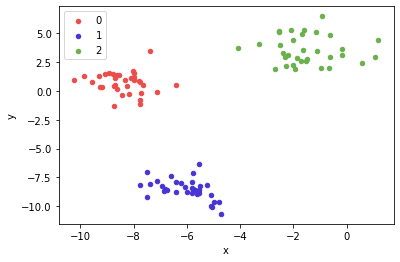

In [22]:
# Generate 100 data with 3 clusters

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2)
df = pd.DataFrame(dict(x = X[:,0], y = X[:,1], label = y))

colors = {0:'#eb4d4b', 1:'#4834d4', 2:'#6ab04c'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()



위 데이터는 라벨이 있어서 (y) 비지도학습인 clustering을 위해서는 라벨을 지워야 합니다. 

## Linear Separability
2D blobs 는 "linearly separable" 하다고 표현 되며 이는 단어 그대로 임의의 직선을 사용해서 오차 없이 데이터를 구분 할 수 있음을 의미합니다. 

In [23]:
points = df.drop('label', axis = 1) # label 삭제 
points.head()

,x,y
0,-9.300827,1.327461
1,-8.682414,1.096749
2,-6.422750,-7.879903
3,-5.080035,-9.055313
4,-1.850381,2.891445


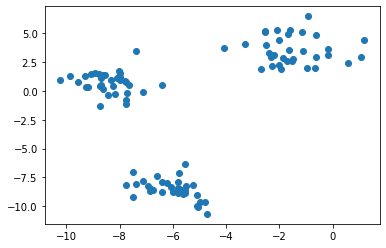

In [25]:
plt.scatter(points.x, points.y);

## 중심점 (Centroid) 계산

K-means 는 centroid-based clustering 알고리즘으로도 불립니다. Centroid란, 주어진 cluster 내부에 있는 모든 점들의 중심 부분에 위치한 가상의 점입니다. 

In [27]:
# 전체 Cluster 의 centroid

dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

-5.353403282483231 -1.386596959383101


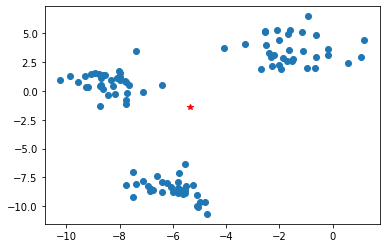

In [36]:
plt.scatter(points.x, points.y)
plt.plot(dataset_centroid_x, dataset_centroid_y, "*r"); # centroid

## 전체 데이터중 랜덤한 데이터를 임의로 가상 cluster의 centroid로 지정

In [38]:
centroids = points.sample(3)
centroids

,x,y
64,-1.127255,3.471526
42,-1.507747,2.817299
56,-2.523946,3.967109


# 그래프에 표기 

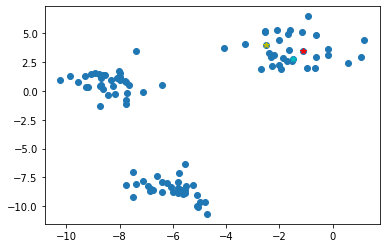

In [40]:
plt.scatter(points.x, points.y)
plt.plot(centroids.iloc[0].x, centroids.iloc[0].y, "*r")
plt.plot(centroids.iloc[1].x, centroids.iloc[1].y, "*c")
plt.plot(centroids.iloc[2].x, centroids.iloc[2].y, "*y");


## 3-means clustering

위에서 3개의 포인트를 선택 하는 방식은 k-means에서 3-means 에 해당하는 방법입니다. 
이후 주변의 포인트를 cluster로 할당 하는 과정을 실행해보도록 하겠습니다.

In [41]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids, iteration): 
 
  # 포인트와 centroid 간의 euclidean 거리 계산
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # 제일 근접한 centroid 선택
  nearest_centroids = np.argmin(distances, axis=1)
    
  # cluster 할당 및 출력
  se = pd.Series(nearest_centroids)
  df['cluster_' + iteration] = se.values
  
  return df

## euclidean distance 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/440px-Euclidean_distance_2d.svg.png'>

제일 직관적이고 단순한 계산 방식인데, 문제는 data 의 dimension에 영향을 많이 받음

In [43]:
first_pass = find_nearest_centroid(points, centroids, '1')
first_pass.head() # cluster_1 added

,x,y,cluster_1
0,-9.300827,1.327461,2
1,-8.682414,1.096749,2
2,-6.422750,-7.879903,1
3,-5.080035,-9.055313,1
4,-1.850381,2.891445,1


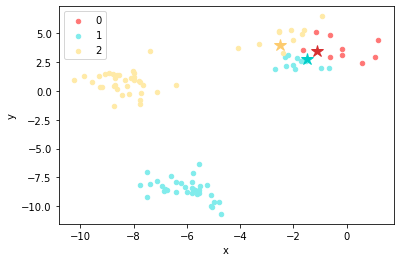

In [50]:
# Group by <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html>
# Dataframe을 value를 기준으로 나눠서 값을 연산

def plot_clusters(df, column_header, centroids):
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "*", color = '#d63031', markersize = 13)
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "*", color = '#00cec9', markersize = 13)
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "*", color = '#fdcb6e', markersize = 13)
  
  grouped = df.groupby(column_header)
  
  colors = {0:'#ff7675', 1:'#81ecec', 2:'#ffeaa7'}
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  
  plt.show();
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [56]:
def get_centroids(df, column_header):
  return df.groupby(column_header).mean()
  
centroids = get_centroids(first_pass, 'cluster_1')

centroids

,x,y
cluster_1,,
0,-0.270175,3.672159
1,-4.920151,-5.604518
2,-6.916262,1.707156


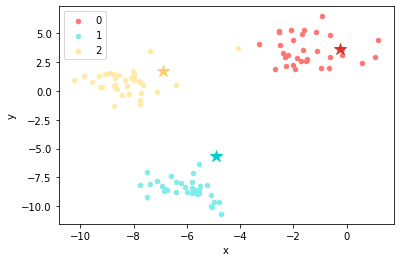

In [63]:
# 변경된 cluster에 대해 centroid 계산
centroids = get_centroids(first_pass, 'cluster_1')

second_pass = find_nearest_centroid(first_pass[['x','y']], centroids, '2')

plot_clusters(second_pass, 'cluster_2', centroids)

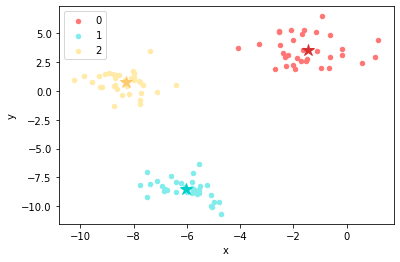

In [64]:
centroids = get_centroids(second_pass, 'cluster_2')

third_pass = find_nearest_centroid(second_pass[['x','y']], centroids, '3')

plot_clusters(third_pass, 'cluster_3', centroids)

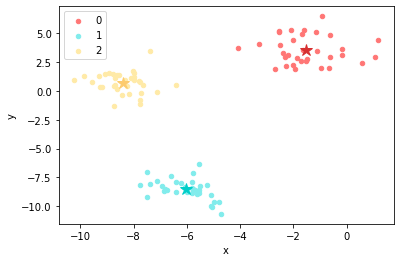

In [65]:
centroids = get_centroids(third_pass, 'cluster_3')

fourth_pass = find_nearest_centroid(third_pass[['x','y']], centroids, '4')

plot_clusters(fourth_pass, 'cluster_4', centroids)

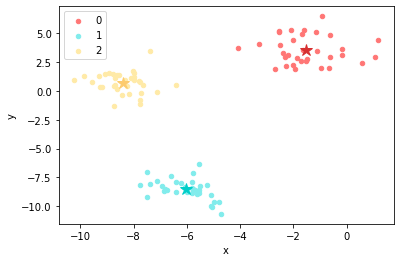

In [66]:
centroids = get_centroids(fourth_pass, 'cluster_4')

fifth_pass = find_nearest_centroid(fourth_pass[['x','y']], centroids, '5')

plot_clusters(fifth_pass, 'cluster_5', centroids)

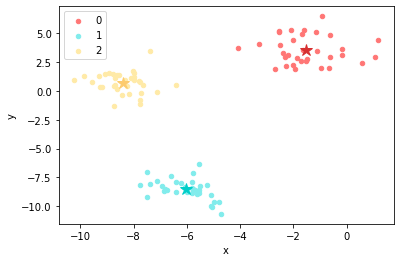

In [67]:
centroids = get_centroids(fifth_pass, 'cluster_5')

sixth_pass = find_nearest_centroid(fifth_pass[['x','y']], centroids, '6')

plot_clusters(sixth_pass, 'cluster_6', centroids)

In [70]:
# 유의미한 차이가 없을 때 까지 반복, 이번 경우에는 전체 cluster에 변화가 없는 것을 기준으로 함.
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])
convergence

True

In [74]:
sixth_pass.head()

,x,y,cluster_6
0,-9.300827,1.327461,2
1,-8.682414,1.096749,2
2,-6.422750,-7.879903,1
3,-5.080035,-9.055313,1
4,-1.850381,2.891445,0


## K-means에서 K를 결정하는 방법

### The Eyeball Method

분석가의 판단을 통해서 ( 데이터의 분포를 보고 ) 임의로 지정하는 방법입니다. 

### Cluster Entropy / Purity ...

## Scikit-learn 라이브러리를 사용하여 K-means를 실행해보도록 하겠습니다

In [71]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

print(labels)

[0 0 1 1 2 0 0 0 0 2 1 1 1 1 0 2 0 0 1 1 0 2 1 1 1 1 0 2 1 2 2 1 2 0 2 0 1
 1 0 1 1 1 2 1 1 2 2 2 0 1 2 1 1 0 2 1 2 0 2 0 0 2 1 0 2 2 2 1 0 2 1 0 1 2
 2 2 1 2 0 1 2 0 2 1 0 2 2 0 0 0 2 0 0 0 0 1 2 0 0 2]


In [72]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

,x,y,label,clusters
0,-9.300827,1.327461,0,0
1,-8.682414,1.096749,0,0
2,-6.422750,-7.879903,1,1
3,-5.080035,-9.055313,1,1
4,-1.850381,2.891445,2,2


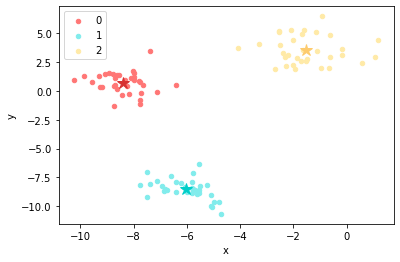

In [73]:
centroids = get_centroids(df, 'clusters') # 같다.
plot_clusters(df, 'clusters', centroids)

# 중요한 고려사항:

## 적당한 clustering 방법의 선택

## 적당한 distance 방법의 선택

## 적당한 parameter 의 선택

- Elbow method


In [75]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

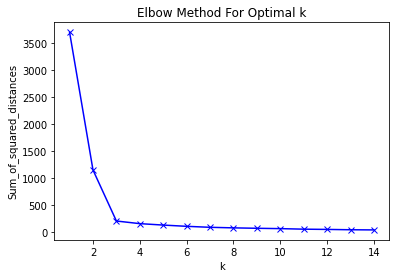

In [76]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 고려사항 2:


## 초기 centroid 값

k-means는 centroid를 어떻게 선택하느냐에 따라서, clustering의 결과가 안좋거나 끝없이 반복해야 하는 경우도 있습니다.

## 계산 복잡도


# 만능 알고리즘은 없습니다

k-means 말고도 상당히 많은 clustering 알고리즘들이 있으며 각자 풀고자 하는 문제에 대해서 최적화 되어있습니다. 그러나, 최적화된 문제를 제외한 다른부분에는 장점을 보이지 못한다는 단점도 있습니다. 

### 데이터 사이언티스트에게 시사하는 바가 무엇인가요?

1) 문제 해결을 위해서 여러 방법이 있지만 항상 각각의 장단점이 있습니다. 그렇기 때문에 더 많은 방법들을 시도해보고 알고 있을 수록 더 다양한 문제에 대한 답을 줄 수 있다는 의미를 가지며 이것은 여러분이 앞으로도 계속 연구를 해야 하는 이유입니다.

2) 한가지 더, 다양한 방법들을 선택하는 최선의 기준은 데이터의 특성일 것입니다. 즉 데이터에 대한 이해가 없다면, 아무리 좋은 방법이 있다고 해도 사용을 할 수 없기 때문에 이것이 도메인에 대한 지식이 필요한 이유입니다.

![No Free Lunch](https://cdn-images-1.medium.com/max/1600/1*oNt9G9UpVhtyFLDBwEMf8Q.png)

[대형 쇼핑몰에서 k-means 알고리즘과 순차 패턴을 이용한 추천 시스템](http://www.ngcists.org/journal/file_down.asp?file_idx=96)